In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)

In [3]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Balance of dataset

In [5]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


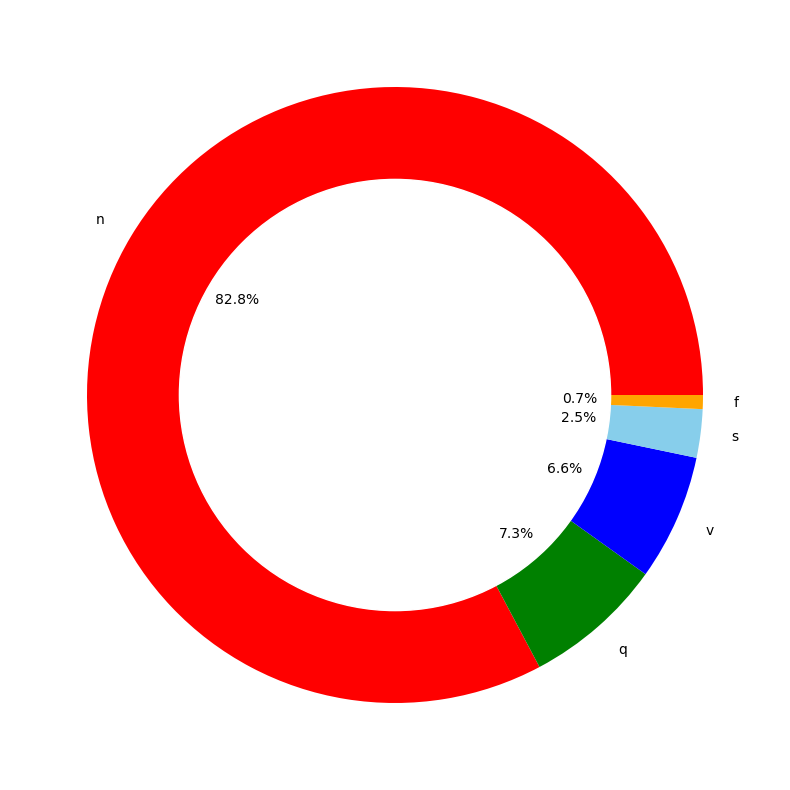

In [6]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [7]:
#select number of trainsing samples to use
Ns = equilibre[0]
print(Ns)

72471


In [8]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=Ns,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=Ns,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=Ns,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=Ns,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=Ns,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [9]:
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
1    72471
2    72471
3    72471
4    72471
Name: 187, dtype: int64


In [10]:
df_0.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10153,0.162791,0.540698,0.755814,0.186047,0.168605,0.546512,0.616279,0.697674,0.651163,0.703488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
33886,0.990066,0.938742,0.344371,0.034768,0.273179,0.331126,0.326159,0.341060,0.347682,0.347682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
32005,0.974239,0.932084,0.590164,0.131148,0.014052,0.168618,0.238876,0.210773,0.196721,0.208431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
56159,0.978495,0.723118,0.526882,0.298387,0.220430,0.158602,0.091398,0.091398,0.080645,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
61783,0.963351,0.709424,0.060209,0.013089,0.057592,0.041885,0.047120,0.034031,0.039267,0.044503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [11]:
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
72471,1.000000,0.666667,0.100457,0.036530,0.073059,0.050228,0.018265,0.105023,0.132420,0.091324,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1
72472,0.983696,1.000000,0.331522,0.000000,0.108696,0.163043,0.130435,0.190217,0.288043,0.222826,...,0.461957,0.483696,0.500000,0.494565,0.510870,0.51087,0.505435,0.472826,0.434783,1
72473,1.000000,0.911504,0.216814,0.000000,0.101770,0.199115,0.176991,0.194690,0.252212,0.238938,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1
72474,0.090498,0.126697,0.217195,0.361991,0.461538,0.556561,0.443439,0.434389,0.452489,0.511312,...,0.122172,0.131222,0.140271,0.158371,0.176471,0.20362,0.212670,0.000000,0.000000,1
72475,0.961111,1.000000,0.551852,0.101852,0.040741,0.085185,0.094444,0.088889,0.085185,0.070370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1


In [12]:
df_1_upsample.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
73817,1.000000,0.622642,0.196226,0.316981,0.324528,0.316981,0.328302,0.339623,0.332075,0.343396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
73593,1.000000,0.964286,0.185714,0.000000,0.114286,0.064286,0.114286,0.128571,0.271429,0.214286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
74237,0.863980,0.748111,0.168766,0.000000,0.105793,0.219144,0.221662,0.229219,0.239295,0.256927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
74625,0.897436,0.851282,0.200000,0.000000,0.117949,0.179487,0.087179,0.143590,0.205128,0.138462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
73618,1.000000,0.672289,0.000000,0.004819,0.154217,0.168675,0.146988,0.115663,0.098795,0.091566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


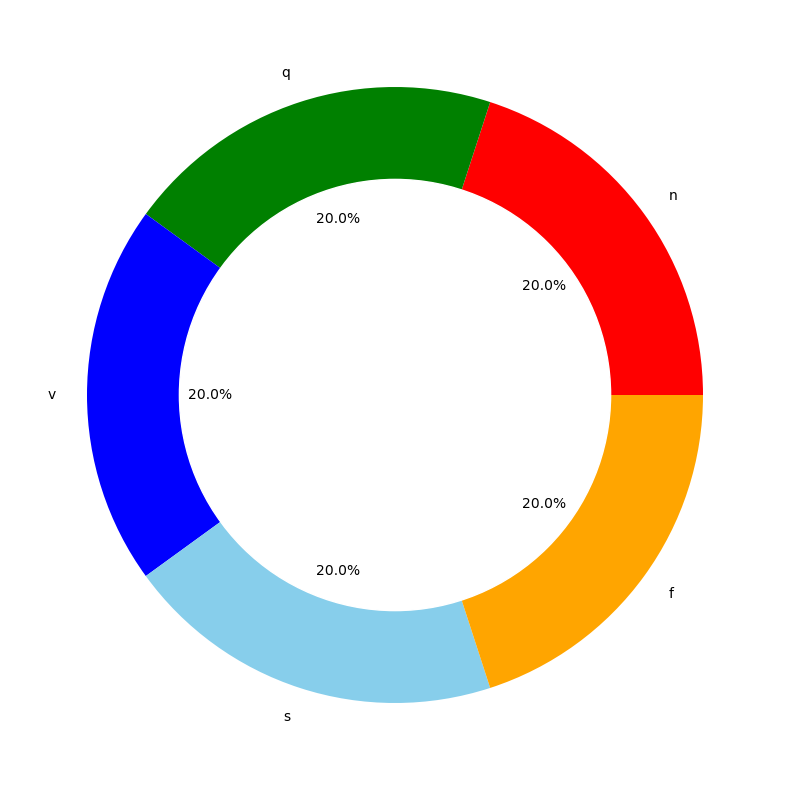

In [13]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [14]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [15]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
40003,0.128866,0.211340,0.288660,0.510309,0.634021,0.752577,0.798969,0.809278,0.798969,0.788660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73838,1.000000,0.842912,0.226054,0.000000,0.053640,0.137931,0.149425,0.168582,0.218391,0.191571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
75949,0.563258,0.435009,0.280763,0.149047,0.013865,0.000000,0.069324,0.107452,0.128250,0.164645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80713,0.613757,0.619048,0.706349,0.777778,0.817460,0.825397,0.822751,0.828042,0.846561,0.857143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
81838,0.925659,0.874101,0.814149,0.761391,0.676259,0.575540,0.456835,0.327338,0.212230,0.164269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


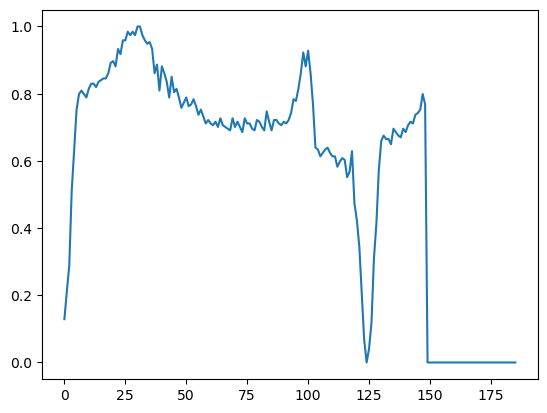

In [16]:
 plt.plot(c.iloc[0,:186])

Here is a normal beat. I don't have something particular to say on that class.

In [17]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

4710615
4710615


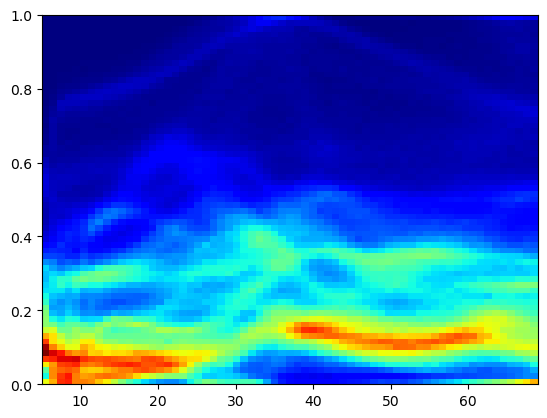

In [18]:
plot_hist(0,70,5,65)

Here is a representation for all the class. We take all the signal and map them. Like that we have an estimation what the signal can look like.

3261195
3261195


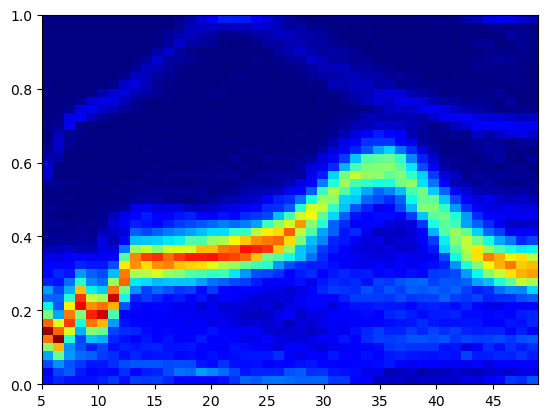

In [19]:
plot_hist(1,50,5,45)

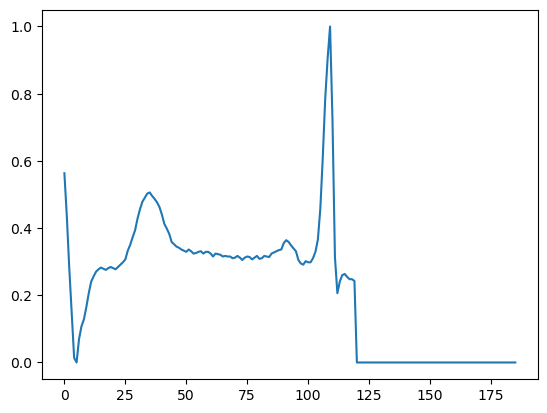

In [20]:
plt.plot(c.iloc[2,:186])

3261195
3261195


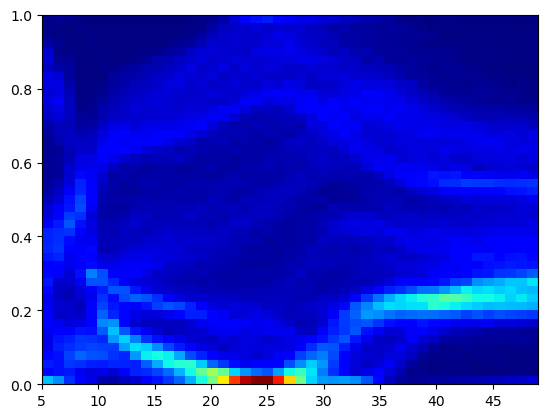

In [21]:
plot_hist(2,50,5,45)

Here is an exemple of the two classes :



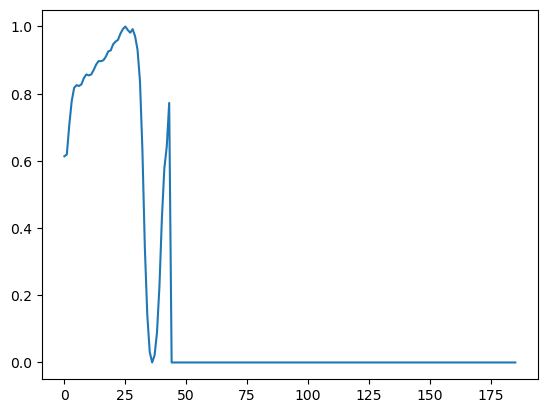

In [22]:
plt.plot(c.iloc[3,:186])

Don't really see the difference with the previous one but i'm not an expert of ECG!

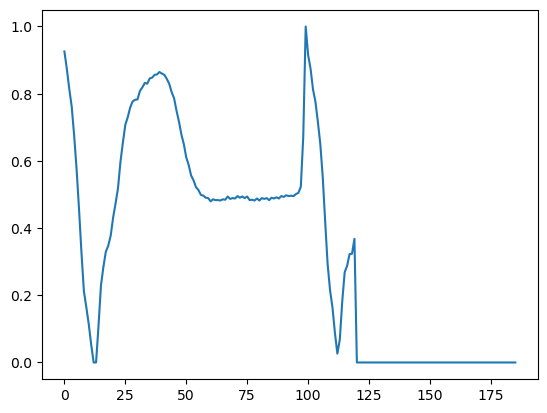

In [23]:
plt.plot(c.iloc[4,:186])

2536485
2536485


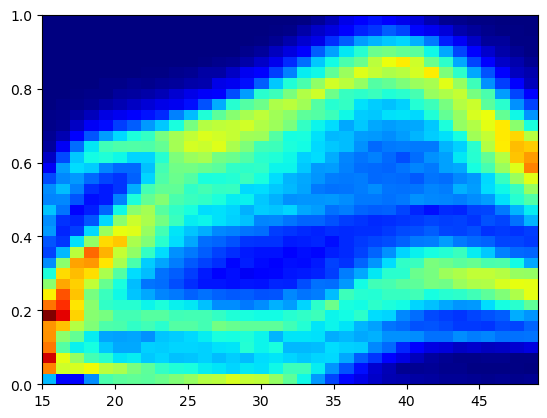

In [24]:
plot_hist(4,50,15,35)

Pretreat

In [25]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [26]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

NameError: name 'add_gaussian_noise' is not defined

In [ ]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [1]:
import os
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

ImportError: cannot import name 'BatchNormalization' from 'keras.layers.normalization' (C:\Users\gky16\anaconda3\lib\site-packages\keras\layers\normalization\__init__.py)

In [2]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

NameError: name 'evaluate_model' is not defined

Anomaly Detection with CNN Autoencoders
n this Jupyter notebook, we will embark on an exploration of the intriguing field of electrocardiogram (ECG) signal processing and classification, utilizing the capabilities of a Convolutional Neural Network (CNN) Autoencoder. Our chosen dataset for this journey is the PTB Diagnostic ECG Database, a meticulously curated collection of ECG signals crafted explicitly for diagnostic purposes. Our primary objective is to construct a robust Autoencoder model tailored for the task of detecting anomalous electrocardiogram (ECG) signals.

Dataset Overview
The PTB Diagnostic ECG Database is a collection of 14,552 ECG recordings sourced from Physionet's PTB Diagnostic Database. These ECG signals are categorized into two classes: normal heartbeats and those affected by cardiac abnormalities. The dataset is sampled at 125Hz, providing high-resolution data for in-depth analysis.

Let's delve into some essential details about the PTB Diagnostic ECG Database:

Number of Samples: 14,552
Number of Categories: 2
Sampling Frequency: 125Hz
Data Source: Physionet's PTB Diagnostic Database

In [4]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split
import matplotlib
matplotlib.rcParams["figure.figsize"] = (6, 4)
plt.style.use("ggplot")
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import mae
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report
import os

In [5]:
gpus = tf.config.list_physical_devices('GPU')
gpus

[]

In [6]:
normal_df = pd.read_csv("ptbdb_normal.csv")
anomaly_df = pd.read_csv("ptbdb_abnormal.csv")
normal_df.head()

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print("Shape of Normal data", normal_df.shape)
print("Shape of Abnormal data", anomaly_df.shape)
Shape of Normal data (4045, 188)

SyntaxError: invalid syntax (270131638.py, line 3)

In [8]:
def plot_sample(normal, anomaly):
    index = np.random.randint(0, len(normal_df), 2)
    
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
    ax[0].plot(normal.iloc[index[0], :].values, label=f"Case {index[0]}")
    ax[0].plot(normal.iloc[index[1], :].values, label=f"Case {index[1]}")
    ax[0].legend(shadow=True, frameon=True, facecolor="inherit", loc=1, fontsize=9)
    ax[0].set_title("Normal")
    
    ax[1].plot(anomaly.iloc[index[0], :].values, label=f"Case {index[0]}")
    ax[1].plot(anomaly.iloc[index[1], :].values, label=f"Case {index[1]}")
    ax[1].legend(shadow=True, frameon=True, facecolor="inherit", loc=1, fontsize=9)
    ax[1].set_title("Anomaly")
    
    plt.tight_layout()
    plt.show()

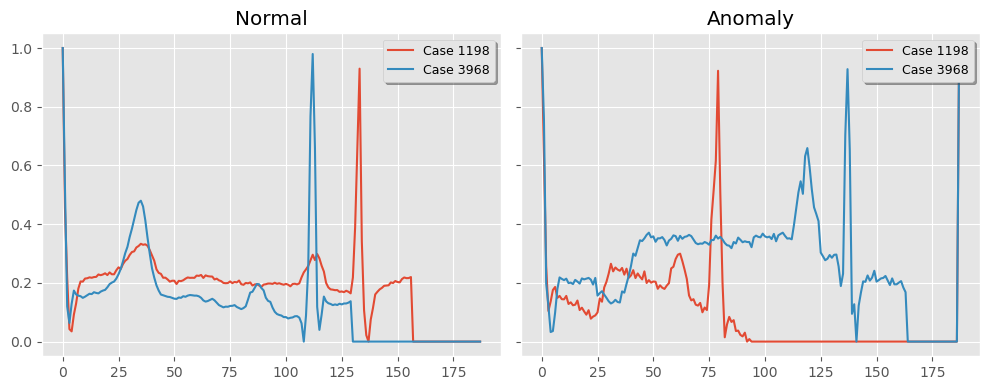

In [9]:
plot_sample(normal_df, anomaly_df)

In [10]:
CLASS_NAMES = ["Normal", "Anomaly"]

normal_df_copy = normal_df.copy()
anomaly_df_copy = anomaly_df.copy()
print(anomaly_df_copy.columns.equals(normal_df_copy.columns))

False


In [11]:
normal_df_copy = normal_df_copy.set_axis(range(1, 189), axis=1)
anomaly_df_copy = anomaly_df_copy.set_axis(range(1, 189), axis=1)
normal_df_copy = normal_df_copy.assign(target = CLASS_NAMES[0])
anomaly_df_copy = anomaly_df_copy.assign(target = CLASS_NAMES[1])


df = pd.concat((normal_df_copy, anomaly_df_copy))

Smoothed Mean Plot for Class Comparison
In this Python code, a function called plot_smoothed_mean is defined for creating smoothed mean plots. It takes input data, a class name, and a step size as parameters. The function calculates the rolling mean and standard deviation of the data with the specified step size, then plots the smoothed mean along with a shaded area representing the margin of three times the standard deviation.

The code also demonstrates the use of this function to compare the smoothed means of different classes. It creates a subplot with two panels, each representing a different class. The data for each class is grouped, and the mean is computed before passing it to the plot_smoothed_mean function. This allows for visualizing how the smoothed means of different classes compare.

The resulting plot provides insights into how the means of different classes vary over time or some other variable represented by the data, with shaded areas indicating the uncertainty around the mean estimates.

In [12]:
def plot_smoothed_mean(data, class_name = "normal", step_size=5, ax=None):
    df = pd.DataFrame(data)
    roll_df = df.rolling(step_size)
    smoothed_mean = roll_df.mean().dropna().reset_index(drop=True)
    smoothed_std = roll_df.std().dropna().reset_index(drop=True)
    margin = 3*smoothed_std
    lower_bound = (smoothed_mean - margin).values.flatten()
    upper_bound = (smoothed_mean + margin).values.flatten()

    ax.plot(smoothed_mean.index, smoothed_mean)
    ax.fill_between(smoothed_mean.index, lower_bound, y2=upper_bound, alpha=0.3, color="red")
    ax.set_title(class_name, fontsize=9)

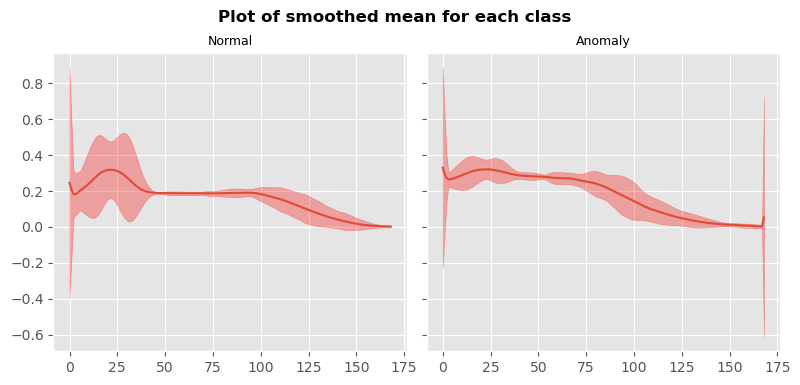

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
axes = axes.flatten()
for i, label in enumerate(CLASS_NAMES, start=1):
    data_group = df.groupby("target")
    data = data_group.get_group(label).mean(axis=0, numeric_only=True).to_numpy()
    plot_smoothed_mean(data, class_name=label, step_size=20, ax=axes[i-1])
fig.suptitle("Plot of smoothed mean for each class", y=0.95, weight="bold")
plt.tight_layout()

# Splitting the data to training and testing set

In [14]:
normal_df.drop("target", axis=1, errors="ignore", inplace=True)
normal = normal_df.to_numpy()
anomaly_df.drop("target", axis=1, errors="ignore", inplace=True)
anomaly = anomaly_df.to_numpy()

X_train, X_test = train_test_split(normal, test_size=0.15, random_state=45, shuffle=True)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}, anomaly shape: {anomaly.shape}")

Train shape: (3438, 188), Test shape: (607, 188), anomaly shape: (10505, 188)


# Building CNN Autoencoder Model

About Autoencoders: Learning Efficient Data Representations
Autoencoders are a class of neural network architectures commonly used in unsupervised machine learning and deep learning tasks. Their primary purpose is to discover and learn efficient representations of data by encoding it into a lower-dimensional latent space and subsequently decoding it back to its original form. Autoencoders play a crucial role in various applications, such as dimensionality reduction, data denoising, anomaly detection, and generative modeling.

The core components of an autoencoder consist of an encoder and a decoder. The encoder maps input data to the latent space, while the decoder reconstructs the data from its encoded representation. During training, autoencoders aim to minimize the reconstruction error between the input and the decoded output, which results in the learning of meaningful data representations.

Autoencoders offer a versatile tool for feature extraction, data compression, and more, making them a valuable addition to the toolkit of data scientists and machine learning practitioners.

In [15]:
class AutoEncoder(Model):
    def __init__(self, input_dim, latent_dim):
        super(AutoEncoder, self).__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim

        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(input_dim,)),
            layers.Reshape((input_dim, 1)),  # Reshape to 3D for Conv1D
            layers.Conv1D(64, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
            layers.Conv1D(latent_dim, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
        ])

        self.decoder = tf.keras.Sequential([
            layers.Conv1D(latent_dim, 3, strides=1, activation='relu', padding="same"),
            layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Conv1D(64, 3, strides=1, activation='relu', padding="same"),
            layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Flatten(),
            layers.Dense(input_dim)
        ])

    def call(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded


input_dim = X_train.shape[-1]
latent_dim = 32

model = AutoEncoder(input_dim, latent_dim)
model.build((None, input_dim))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mae")
model.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 47, 32)            6816      
                                                                 
 sequential_1 (Sequential)   (None, 188)               2271900   
                                                                 
Total params: 2,278,716
Trainable params: 2,278,332
Non-trainable params: 384
_________________________________________________________________


In [16]:
epochs = 100
batch_size = 64
early_stopping = EarlyStopping(patience=10, min_delta=1e-3, monitor="val_loss", restore_best_weights=True)


history = model.fit(X_train, X_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
49/49 [==============================] - 7s 88ms/step - loss: 5.7912 - val_loss: 1.6446
Epoch 2/100
49/49 [==============================] - 4s 80ms/step - loss: 2.2633 - val_loss: 1.1791
Epoch 3/100
49/49 [==============================] - 4s 79ms/step - loss: 1.5189 - val_loss: 0.8997
Epoch 4/100
49/49 [==============================] - 4s 84ms/step - loss: 0.9510 - val_loss: 0.5519
Epoch 5/100
49/49 [==============================] - 4s 83ms/step - loss: 0.5994 - val_loss: 0.4038
Epoch 6/100
49/49 [==============================] - 4s 90ms/step - loss: 0.3284 - val_loss: 0.2714
Epoch 7/100
49/49 [==============================] - 6s 125ms/step - loss: 0.2069 - val_loss: 0.1910
Epoch 8/100
49/49 [==============================] - 6s 122ms/step - loss: 0.1508 - val_loss: 0.1286
Epoch 9/100
49/49 [==============================] - 6s 114ms/step - loss: 0.1008 - val_loss: 0.0906
Epoch 10/100
49/49 [==============================] - 5s 99ms/step - loss: 0.1079 - val_loss: 0.0

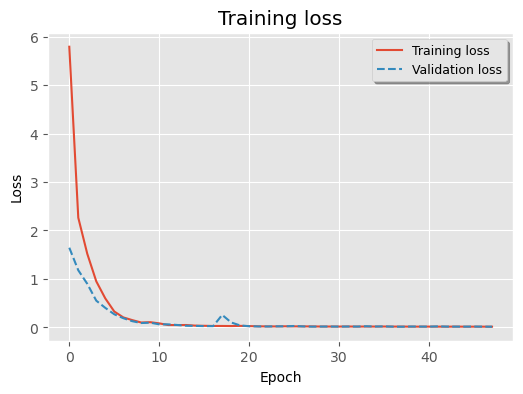

In [17]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss", ls="--")
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.title("Training loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [18]:
train_mae = model.evaluate(X_train, X_train, verbose=0)
test_mae = model.evaluate(X_test, X_test, verbose=0)
anomaly_mae = model.evaluate(anomaly_df, anomaly_df, verbose=0)

print("Training dataset error: ", train_mae)
print("Testing dataset error: ", test_mae)
print("Anormaly dataset error: ", anomaly_mae)

Training dataset error:  0.013581917621195316
Testing dataset error:  0.014330290257930756
Anormaly dataset error:  0.04704704508185387


# Model Evaluation

Model Evaluation Metrics
The following evaluation metrics provide a comprehensive assessment of the performance of our model:

Accuracy (99.15%): Accuracy measures the proportion of correct predictions out of all predictions made by the model, indicating an exceptionally high overall classification correctness.

Precision (99.75%): Precision is the percentage of true positive predictions relative to all positive predictions made by the model, signifying the model's precision in correctly identifying positive instances.

Recall (97.21%): Recall, also known as sensitivity, represents the model's ability to accurately identify positive instances out of all actual positive instances, demonstrating a strong capability to capture true positives.

F1 Score (98.46%): The F1 score is a composite metric that balances precision and recall, providing an overall measure of model performance. With an F1 score close to 100%, the model effectively balances precision and recall for this task.

These metrics collectively indicate a high-performing model with a remarkable ability to make accurate predictions across the target classes.

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings

import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import LearningRateScheduler

import itertools
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error

from tensorflow.keras.layers import BatchNormalization
import cv2
from tensorflow.keras.optimizers import Adam , Adadelta

warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.library['seaborn-whitegrid']

RcParams({'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.grid': True,
          'axes.labelcolor': '.15',
          'axes.linewidth': 1.0,
          'figure.facecolor': 'white',
          'font.family': ['sans-serif'],
          'font.sans-serif': ['Arial',
                              'Liberation Sans',
                              'DejaVu Sans',
                              'Bitstream Vera Sans',
                              'sans-serif'],
          'grid.color': '.8',
          'grid.linestyle': '-',
          'image.cmap': 'Greys',
          'legend.frameon': False,
          'legend.numpoints': 1,
          'legend.scatterpoints': 1,
          'lines.solid_capstyle': <CapStyle.round: 'round'>,
          'text.color': '.15',
          'xtick.color': '.15',
          'xtick.direction': 'out',
          'xtick.major.size': 0.0,
          'xtick.minor.size': 0.0,
          'ytick.color': '.15',
          'ytick.direct

In [29]:
import pandas as pd
train = pd.read_csv("mitbih_train.csv" , header = None)
test = pd.read_csv("mitbih_test.csv" , header = None)

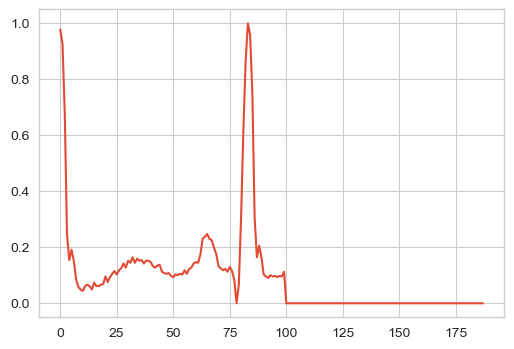

In [30]:
for i in range(1): plt.plot(train.iloc[i])
plt.show()

In [31]:
train.rename(columns={187:"Class"}, inplace=True)
test.rename(columns={187:"Class"}, inplace=True)

In [32]:
train['Class'].unique()

array([0., 1., 2., 3., 4.])

In [33]:
mapping = {    0. : 'Normal Beat',
               1. : 'Supraventricular premature beat',
               2. : 'Premature ventricular contraction',
               3. : 'Fusion of ventricular',
               4. : 'Unclassifiable beat'}

In [34]:
train['label'] = train.iloc[:, -1].map(mapping)
test['label'] = test.iloc[:, -1].map(mapping)

In [35]:
from sklearn.utils import resample

df_1=train[train['Class']==1]
df_2=train[train['Class']==2]
df_3=train[train['Class']==3]
df_4=train[train['Class']==4]
df_0=(train[train['Class']==0]).sample(n=20000,random_state=42)


train=pd.concat([df_0,df_1,df_2,df_3,df_4])

In [36]:
X_train=train.iloc[:,:186].values
X_test=test.iloc[:,:186].values

In [37]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=1)
X_train, y_train = oversample.fit_resample(X_train, train["Class"])

In [38]:
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [39]:
target_test=test["Class"]
#target_train = train['Class']

In [40]:
y_train= np.array(y_train).reshape(-1,1)
y_test= np.array(target_test).reshape(-1,1)

In [41]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
encoder_df1 = pd.DataFrame(enc.fit_transform(y_train).toarray())
encoder_df2 = pd.DataFrame(enc.fit_transform(y_test).toarray())

In [42]:
y_train = np.array(encoder_df1)
y_test = np.array(encoder_df2)

In [43]:
import tensorflow
X_train =tensorflow.convert_to_tensor(X_train, dtype=tensorflow.float32)
y_train = tensorflow.convert_to_tensor(y_train, dtype=tensorflow.float32)

X_test = tensorflow.convert_to_tensor(X_test, dtype=tensorflow.float32)
y_test = tensorflow.convert_to_tensor(y_test, dtype=tensorflow.float32)

In [44]:
X_train.shape

TensorShape([100000, 186, 1])

In [45]:
n_obs, feature , width= X_train.shape
batch_size = 500

In [46]:
model = Sequential()

model.add(Convolution1D(filters=32, kernel_size=5, strides=1 , input_shape=(186,1)))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(5, activation='softmax'))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 182, 32)           192       
                                                                 
 conv1d_5 (Conv1D)           (None, 182, 32)           5152      
                                                                 
 conv1d_6 (Conv1D)           (None, 182, 32)           5152      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 89, 32)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 89, 32)            5152      
                                                                 
 conv1d_8 (Conv1D)           (None, 89, 32)            5152      
                                                      

In [48]:
adam = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [49]:
def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.75
    t = n_obs//(10000 * batch_size)  # every epoch we do n_obs/batch_size iteration
    lrate = initial_lrate * np.math.exp(-k*t)
    return lrate

In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
lrate = LearningRateScheduler(exp_decay)

In [52]:
my_callbacks = [
#    keras.callbacks.EarlyStopping(monitor='val_loss' , patience=8),
    keras.callbacks.ModelCheckpoint(filepath='xai_cnn_model.h5' , monitor = 'val_loss' , save_best_only=True),
    lrate
]

In [53]:
history=model.fit(X_train, y_train,epochs=10,callbacks=my_callbacks, batch_size=500,validation_split=0.3)

Epoch 1/10
140/140 [==============================] - 59s 400ms/step - loss: 0.4041 - accuracy: 0.8609 - val_loss: 2.3884 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/10
140/140 [==============================] - 46s 326ms/step - loss: 0.1899 - accuracy: 0.9334 - val_loss: 2.7054 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/10
140/140 [==============================] - 51s 367ms/step - loss: 0.1465 - accuracy: 0.9488 - val_loss: 2.0999 - val_accuracy: 0.0078 - lr: 0.0010
Epoch 4/10
140/140 [==============================] - 59s 424ms/step - loss: 0.1184 - accuracy: 0.9592 - val_loss: 0.8246 - val_accuracy: 0.6566 - lr: 0.0010
Epoch 5/10
140/140 [==============================] - 49s 353ms/step - loss: 0.0973 - accuracy: 0.9662 - val_loss: 0.9022 - val_accuracy: 0.6623 - lr: 0.0010
Epoch 6/10
140/140 [==============================] - 53s 379ms/step - loss: 0.0854 - accuracy: 0.9701 - val_loss: 0.3129 - val_accuracy: 0.8802 - lr: 0.0010
Epoch 7/10
140/140 [========================

In [54]:
y_pred = model.predict(X_test, batch_size=1000)

22/22 [==============================] - 3s 112ms/step


In [55]:
y_pred=np.argmax(y_pred, axis=1)

In [56]:
yyy_test = np.argmax(y_test , axis = 1)

In [57]:
print("Model Accuracy is : " , accuracy_score(yyy_test, y_pred) )

Model Accuracy is :  0.69993604969852


In [58]:
print(classification_report(yyy_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79     18118
           1       0.23      0.64      0.34       556
           2       0.22      0.99      0.35      1448
           3       0.48      0.28      0.36       162
           4       0.99      0.93      0.96      1608

    accuracy                           0.70     21892
   macro avg       0.58      0.70      0.56     21892
weighted avg       0.92      0.70      0.76     21892



In [59]:
model.save("xai_cnn_model.h5")

In [60]:
import tensorflow.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
#tf.compat.v1.reset_default_graph()


run_eagerly = True



def gradcam(model, x, index, layer_name):
    #with tf.Graph().as_default():
    model = tf.keras.models.load_model('./xai_cnn_model.h5')
    preds = model.predict(x)
    #model._make_predict_function()
    pred_class = np.argmax(preds[index])
    
    #pred_class_name = imagenet_utils.decode_predictions(preds)[0][0][1]
    
    pred_output = model.output[:, pred_class]
    
    # convolution layer  feature map
    # convolution layer
    last_conv_layer = model.get_layer(layer_name)
    
    # convolution layer 
    grads = K.gradients(pred_output, last_conv_layer.output)[0]
    
    #  feature map 
    #pooled_grads = K.sum(grads, axis=(0, 1, 2))
    pooled_grads = K.sum(grads, axis=(0, 1))
    
    # K.function() `model.input`  `pooled_grads` 
    # `last_conv_layer[0]` ， Tensorflow  feed_dict
    
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[index]])
    
    # feature map
    pooled_grads_value, conv_layer_output_value = iterate([x])
    
    for i in range(pooled_grads_value.shape[0]):
        conv_layer_output_value[:, i] *= (pooled_grads_value[i])
        
    #feature map  channel-wise 
    heatmap = np.sum(conv_layer_output_value, axis=-1)
    
    return heatmap, pred_class

In [61]:
def heatmap_():
    heatmap_2d = np.expand_dims(heatmap,1)
    heatmap_2d = cv2.resize(heatmap_2d, (100,188))

    figure = plt.figure(figsize=(80,4))
    ax = figure.add_subplot(111)
    x = np.arange(0, 188, 1)
    ax.plot(x, data*100)
    ax.imshow(np.transpose(heatmap_2d), cmap="Oranges", extent=[0, 188, -10, 120])
    ax.autoscale(False)
    ax.set_xlim(0, 187)
    ax.set_ylim(-10, 110)
    ax.set_title(title)
    plt.show()

In [62]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.output_shape)

0 conv1d_4 (None, 182, 32)
1 conv1d_5 (None, 182, 32)
2 conv1d_6 (None, 182, 32)
3 max_pooling1d_2 (None, 89, 32)
4 conv1d_7 (None, 89, 32)
5 conv1d_8 (None, 89, 32)
6 max_pooling1d_3 (None, 43, 32)
7 conv1d_9 (None, 43, 32)
8 conv1d_10 (None, 43, 32)
9 max_pooling1d_4 (None, 20, 32)
10 conv1d_11 (None, 20, 32)
11 conv1d_12 (None, 20, 32)
12 max_pooling1d_5 (None, 8, 32)
13 conv1d_13 (None, 8, 32)
14 conv1d_14 (None, 8, 32)
15 max_pooling1d_6 (None, 2, 32)
16 flatten_1 (None, 64)
17 dense_1 (None, 512)
18 batch_normalization_4 (None, 512)
19 dense_2 (None, 256)
20 batch_normalization_5 (None, 256)
21 dense_3 (None, 64)
22 batch_normalization_6 (None, 64)
23 dense_4 (None, 5)


In [63]:
def heatmap_3x():
    def preprocess_heatmap(heatmap):
        heatmap_2d = np.expand_dims(heatmap,1)
        heatmap_2d = cv2.resize(heatmap_2d, (100,186))
        heatmap_2d = np.transpose(heatmap_2d)
        return heatmap_2d

    fig, ax = plt.subplots(1,len(name_list)+1,figsize=(20,4))
    x = np.arange(0, 186, 1)
    Collect_attention = list()
    for i in range(1,len(name_list)+1):
        ax[i].plot(x, data*100)
        heatmap_2d = preprocess_heatmap(Collect_heatmap[i-1])
        Collect_attention.append(heatmap_2d[0])
        ax[i].imshow(heatmap_2d, cmap="Oranges", extent=[0, 186, -10, 120])
        ax[i].set_xlim(0, 187)
        ax[i].set_ylim(-10, 110)
        ax[i].set_title(name_list[i-1])
    ax[0].plot(x, data, label="ECG")
    for i in range(len(name_list)):
        ax[0].set_title(title)
        ax[0].plot(x, Collect_attention[i]/np.max(Collect_attention[i]), label=name_list[i])
        ax[0].set_ylim(-0.2, 1)
    ax[0].legend()

    plt.show()

In [64]:
X_display = np.array(X_test).astype(float)

In [65]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
y_display = y_test.tolist()

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


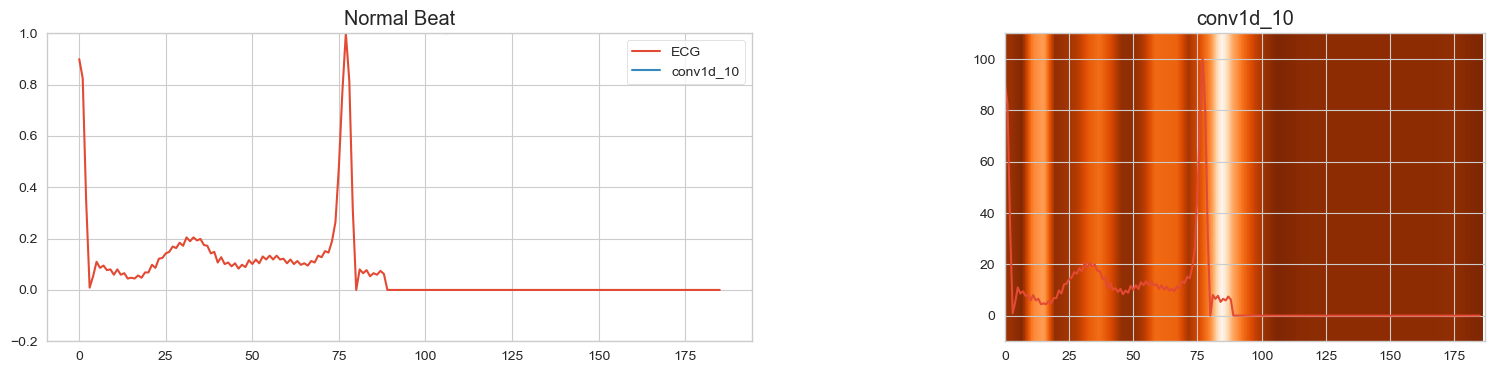

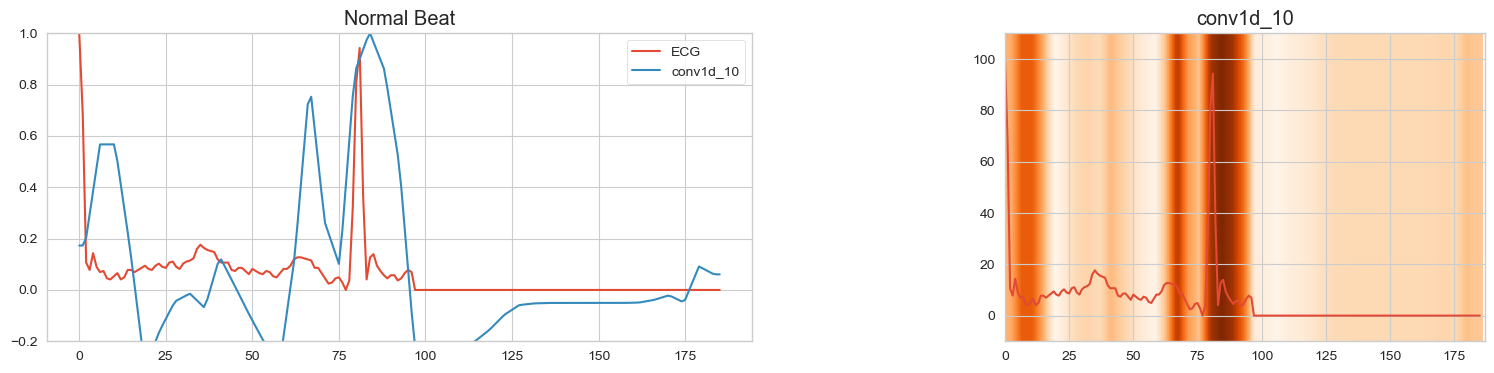

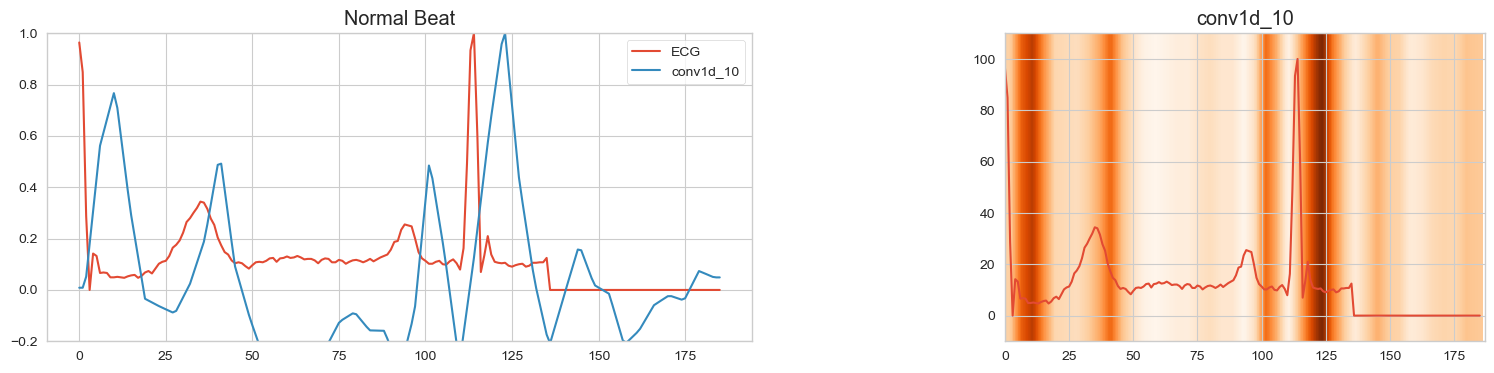

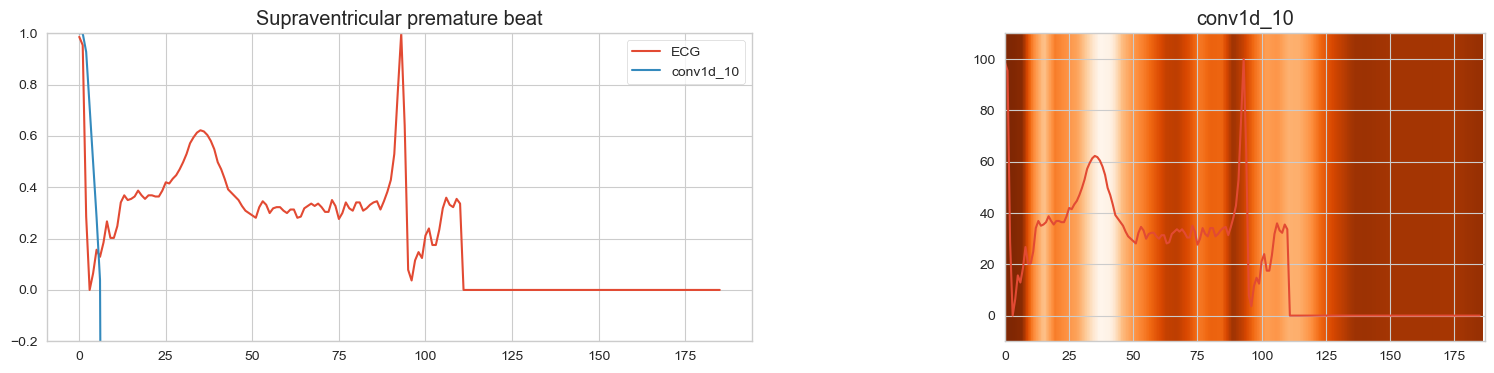

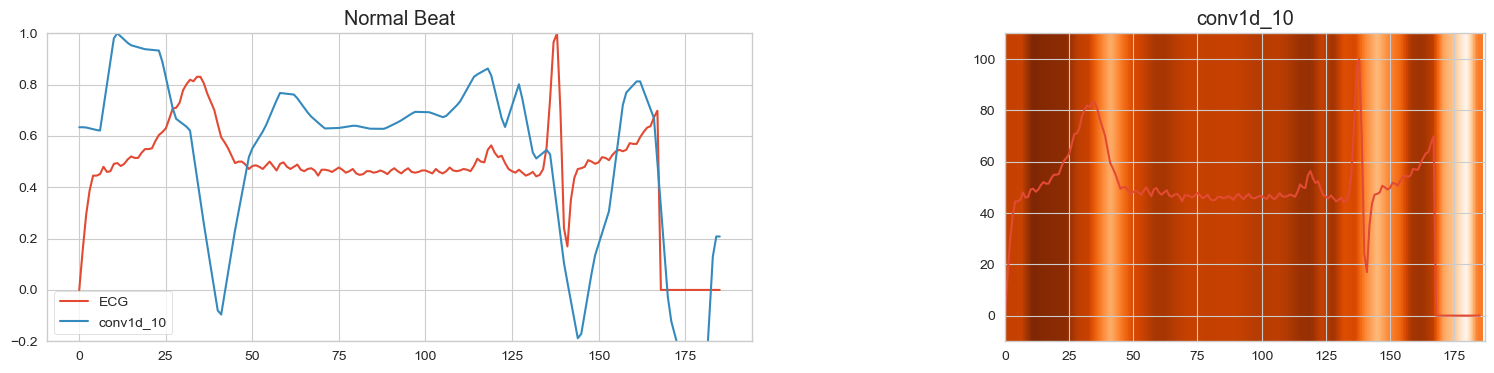

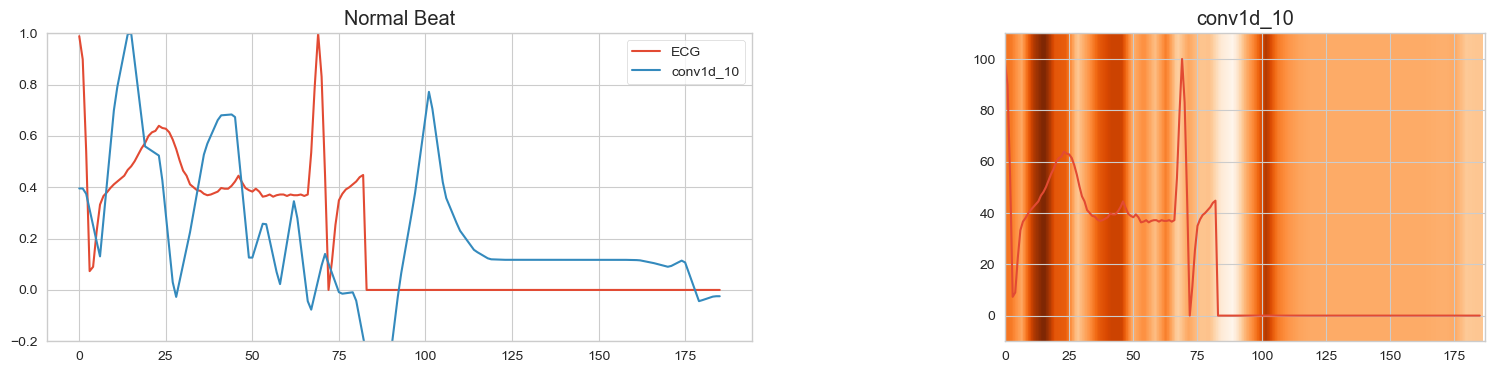

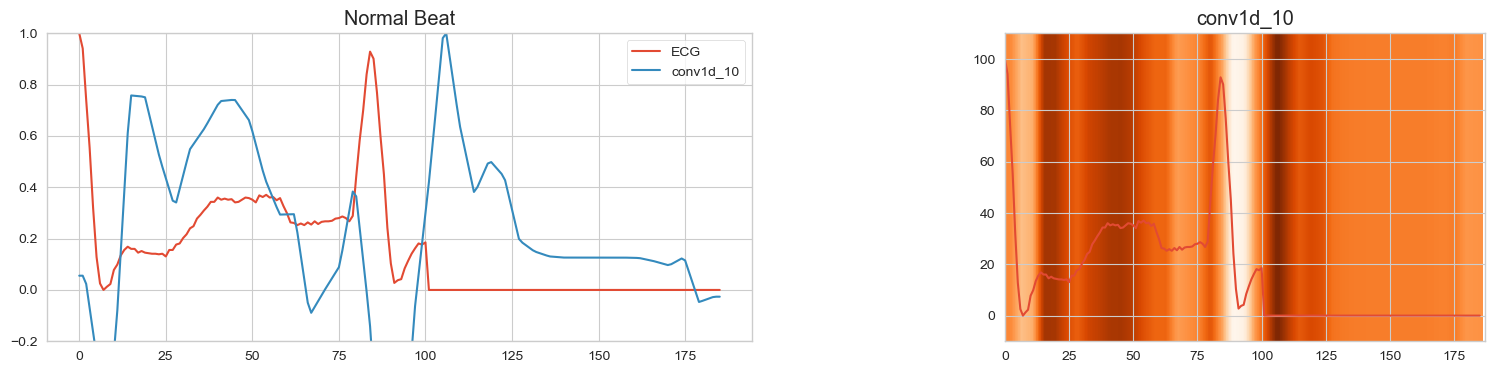

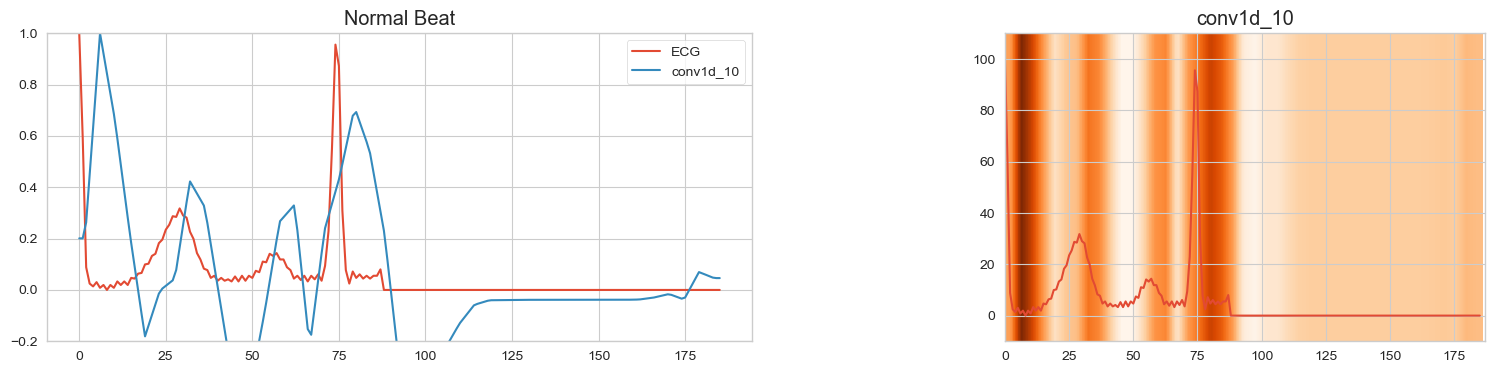

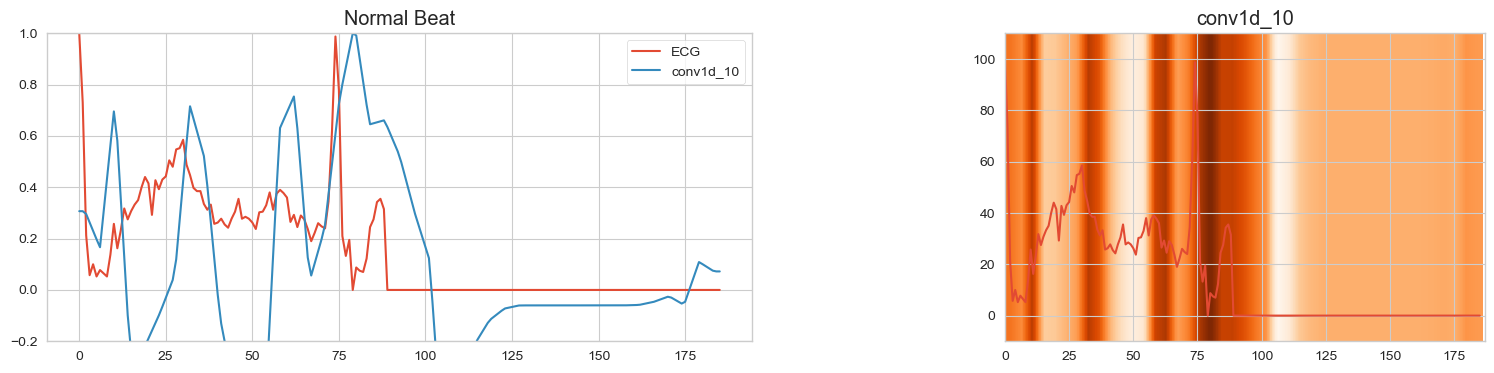

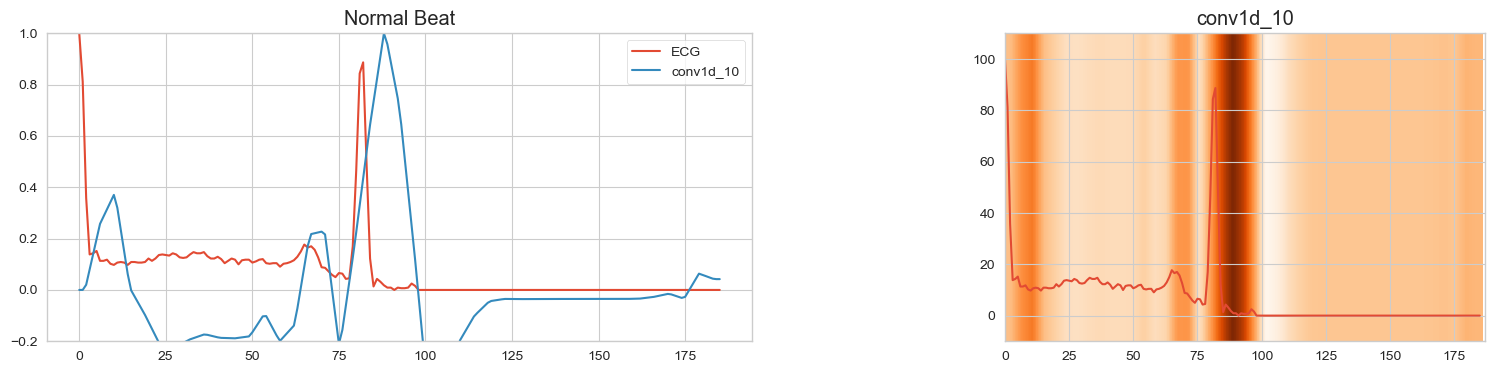

In [66]:
for i in range(10):
    Collect_heatmap = list()
    index = np.random.randint(0,len(X_display))
    name_list = ["conv1d_10"]
    for name in name_list:
        heatmap, pred_class = gradcam(model, X_display, index, name)
        Collect_heatmap.append(heatmap)
    data = X_display[index]
    if int(y_display[index][0]==1): 
      title = "Normal Beat"
    elif int(y_display[index][1]==1):
      title = "Supraventricular premature beat"
    elif int(y_display[index][2]==1):
      title = "Premature ventricular contraction beat"
    elif int(y_display[index][3]==1):
      title = "Fusion of ventricular beat"
    elif int(y_display[index][4]==1):
      title = "Unclassifiable"
   
    heatmap_3x()